<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/Adaptive%20Supertrend%20%2B%20return%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
!pip install pandas_ta
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import pandas_ta as ta
import pandas_datareader as pdr

In [376]:
# df = pd.read_csv("/content/untitled1")
# df.set_index(['Date'],inplace = True)
df = pdr.get_data_yahoo("GOOG","2013-01-01","2014-01-01")

In [377]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,362.142609,356.937103,358.366760,360.274597,5101500,360.274597
2013-01-03,364.598389,359.014313,361.111481,360.483826,4653700,360.483826
2013-01-04,369.350586,362.481323,363.308228,367.607117,5547600,367.607117
2013-01-07,368.309479,363.925903,366.351837,366.003143,3323800,366.003143
2013-01-08,366.775238,360.862396,366.396667,365.280823,3364700,365.280823
...,...,...,...,...,...,...
2013-12-24,555.537720,551.981018,555.403198,553.844055,1473800,553.844055
2013-12-26,557.410706,552.274963,554.924988,556.643555,2685500,556.643555
2013-12-27,558.048279,554.392029,557.908813,557.111816,3151100,557.111816


In [378]:
raw = df.copy()
raw['ADX'] = ta.adx(raw.High, raw.Low, raw.Close)['ADX_14']
raw['DMP'] = ta.adx(raw.High, raw.Low, raw.Close)['DMP_14']
raw['DMN'] = ta.adx(raw.High, raw.Low, raw.Close)['DMN_14']

In [379]:
w = []
for i in range(len(df)):
  t = raw[:i+1]
  
  if (t['ADX'].values[i]>0) and (t['ADX'].values[i]<=20):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7, 3.0)['SUPERT_7_3.0'].values[-1])
  elif (t['ADX'].values[i]>20 and (t['ADX'].values[i]<=40)):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7,2.0)['SUPERT_7_2.0'].values[-1])
  elif (t['ADX'].values[i]>40 and (t['ADX'].values[i]<=50)):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7,1.75)['SUPERT_7_1.75'].values[-1])  
  elif (t['ADX'].values[i]>50) and (t['ADX'].values[i]<=100):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7,1.0)['SUPERT_7_1.0'].values[-1])
  # elif (t['ADX'].values[i]>75) and (t['ADX'].values[i]<=100):
  #   w.append(ta.supertrend(t.high, t.low, t.close, 14, 1.0)['SUPERT_14_1.0'].values[-1])


In [380]:
data = df.iloc[1:].copy()
data['Supertrend'] = w

In [381]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Supertrend'], dtype='object')

In [382]:
# data['cci'] = ta.cci(data.High, data.Low, data.Close,7)
# data['rsi'] = ta.rsi(data['Close'],7)
e = ta.vp(data.Close, data.Volume)
# e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-1]

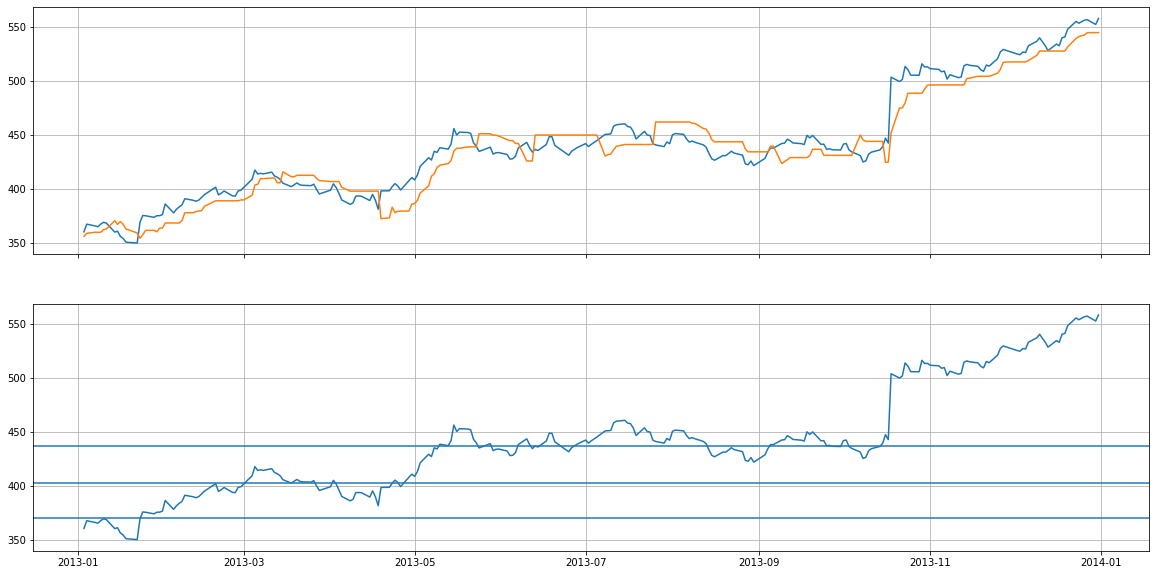

In [383]:
fig,ax = plt.subplots(2, figsize = (20,10), sharex = True)
ax[0].plot(data[['Close','Supertrend']])
ax[1].plot(data['Close'])
ax[1].axhline(e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-1])
ax[1].axhline(e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-2])
ax[1].axhline(e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-3])
# ax[1].plot(data['rsi'])
# ax[1].axhline(70, color = 'b', linestyle= "--")
# ax[1].axhline(30, color = 'b', linestyle= "--")
# ax[1].axhline(50, color = 'b', linestyle= "--")

ax[0].grid()
ax[1].grid()
# data[['Close','Supertrend']].plot(figsize = (20,10))

In [344]:
# long = (ta.wma(df.Close.shift(-2),30)-ta.wma(df.Close,30)) > 0
long = data.Close>data.Supertrend

In [345]:
trendy = data.ta.trend_return(trend=long, cumulative=True)
trendy.tail() 

,CLTR,TR_LOGRET,CLTR_Trends,CLTR_Trades
date,,,,
2018-12-24,0.0,0.0,0,0
2018-12-26,0.0,0.0,0,0
2018-12-27,0.0,0.0,0,0
2018-12-28,0.0,0.0,0,0
2018-12-31,0.0,0.0,0,0


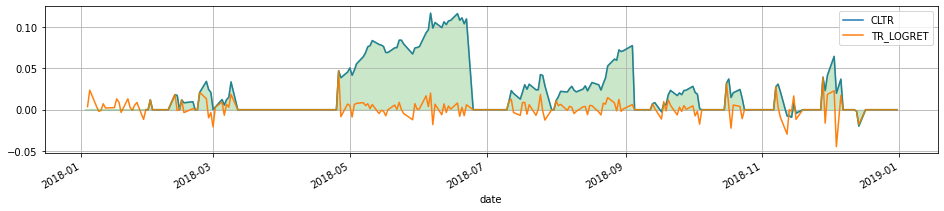

In [346]:
cltr = trendy.iloc[:,0]
tr = trendy.iloc[:,1]

trendy.iloc[:,:2].plot(figsize=(16, 3))
cltr.plot(figsize=(16, 3), kind="area", stacked=False, alpha=0.25, grid=True)

In [347]:
(cltr*20000).cumsum()

date
2018-01-03              NaN
2018-01-04              NaN
2018-01-05              NaN
2018-01-08              NaN
2018-01-09              NaN
                  ...      
2018-12-24    109990.993395
2018-12-26    109990.993395
2018-12-27    109990.993395
2018-12-28    109990.993395
2018-12-31    109990.993395
Name: CLTR, Length: 250, dtype: float64

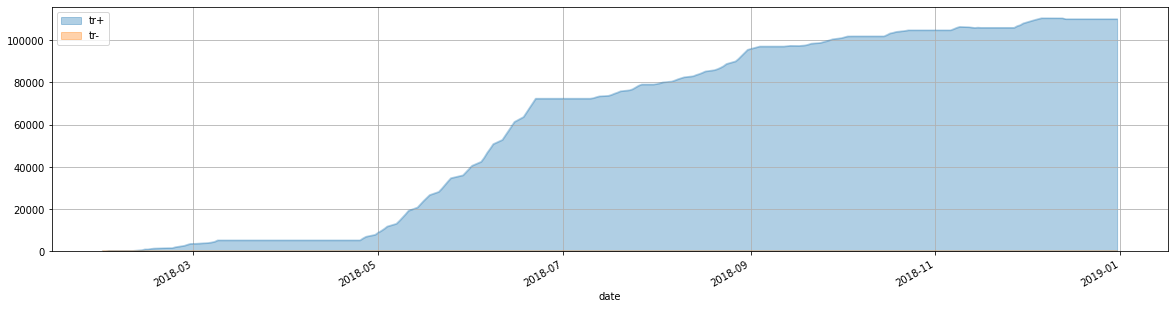

In [348]:
capital = 20000

total_return = (cltr.cumsum() * capital)
positive_return = total_return[total_return > 0]
negative_return = total_return[total_return <= 0]
trdf = pd.DataFrame({"tr+": positive_return, "tr-": negative_return})
trdf.plot(figsize=(20, 5), kind="area", stacked=False, alpha=0.35, grid=True)

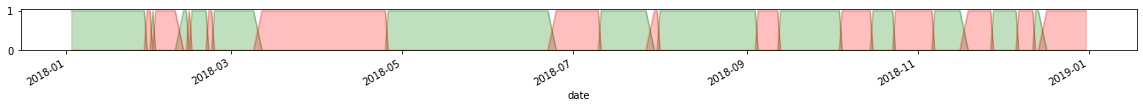

In [349]:
long_trend = (trendy.iloc[:,-2] > 0).astype(int)
short_trend = (1 - long_trend).astype(int)

long_trend.plot(figsize=(20, 0.85), kind="area", color = 'green',stacked=True, alpha=0.25)
short_trend.plot(figsize=(20, 0.85), kind="area", color = 'red', stacked=True,  alpha=0.25)

In [350]:
entries = (trendy.iloc[:,-1] > 0).astype(int) * data.close
entries[entries < 0.0001] = np.nan
entries.name = "Entry"


exits = (trendy.iloc[:,-1] < 0).astype(int) * data.close
exits[exits < 0.0001] = np.nan
exits.name = "Exit"

total_trades = trendy.iloc[:,-1].abs().sum()
print(f"Total Trades: {total_trades}")

all_trades = trendy.iloc[:,-1].copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({"Signal": all_trades, entries.name: entries.dropna(), exits.name: exits.dropna()})
trades

Total Trades: 25


,Signal,Entry,Exit
date,,,
2018-01-29,-1,NaN,124.839996
2018-01-31,1,124.230003,NaN
2018-02-01,-1,NaN,125.720001
2018-02-09,1,116.320000,NaN
2018-02-13,-1,NaN,118.349998
2018-02-14,1,120.830002,NaN
2018-02-20,-1,NaN,122.010002
2018-02-22,1,120.379997,NaN
2018-03-09,-1,NaN,124.510002


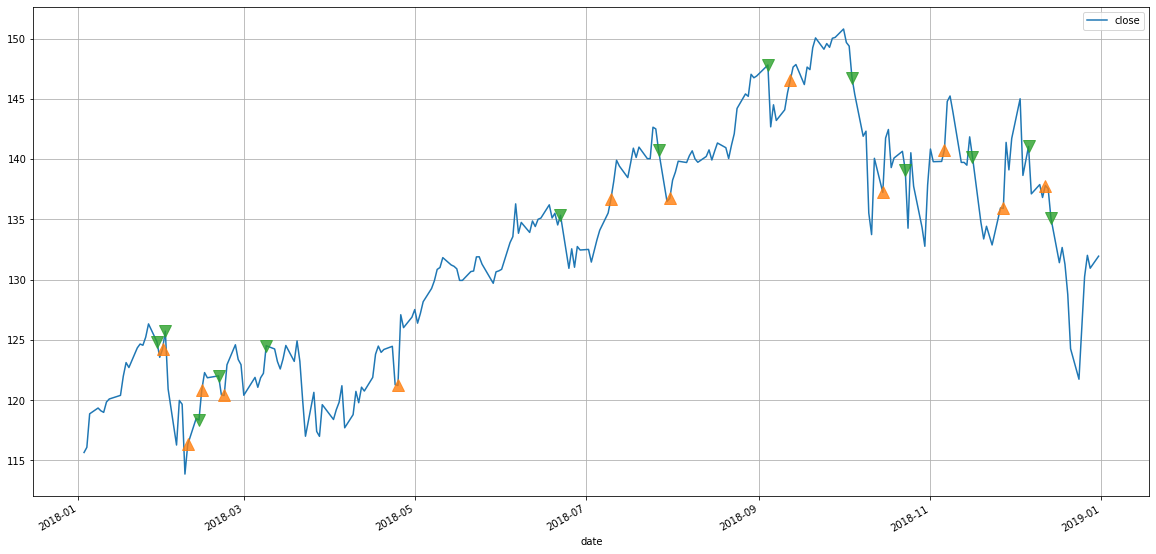

In [351]:

chart = data[["close"]]#, "wma8", "wma21", "wma50"]]
chart.plot(figsize=(20, 10),  grid=True)
entries.plot(figsize=(20, 10), marker="^", markersize=12, alpha=0.8)
exits.plot(figsize=(20, 10),  marker="v", markersize=12, alpha=0.8, grid=True)
# plt.plot(ta.supertrend(df.high,df.low,df.close,21,2.5)[['SUPERTl_21_2.5','SUPERTs_21_2.5']])#plot(figsize=(20,10))